<a href="https://colab.research.google.com/github/Samoh63/Machine-Learning/blob/main/ML_project_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect Kaggle dataset to Colab

https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=L7ZmFbHybsPk

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
! kaggle datasets download -d ruthgn/beer-profile-and-ratings-data-set
! unzip beer-profile-and-ratings-data-set.zip

  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 88.6MB/s]
Archive:  beer-profile-and-ratings-data-set.zip
  inflating: Beer Descriptors Simplified.xlsx  
  inflating: Beer Name Fuzzy Match List.csv  
  inflating: Brewery Name Fuzzy Match List.csv  
  inflating: beer_profile_and_ratings.csv  


## Import Library

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
########################################3
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV  #cross validaton grid search 

##########################################333
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
# basepath = "Dept_23-00089/23-00089_ACS_data/23-00089_ACS_race-sex-age/"
data = pd.read_csv("beer_profile_and_ratings.csv")

aa=data.groupby('Style')['Style'].count().sort_values(ascending=False)
print(data.columns)
# data

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


In [ ]:
x = data.drop(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'review_aroma', 'review_appearance', 'review_palate',\
               'review_taste','review_overall', 'number_of_reviews'], axis =1)
y = data['Style']
# x

## Section 1. Normalize and standardize the input features

In [ ]:
# Normalize
# scalar = MinMaxScaler()
# xn = scalar.fit_transform(x)
# xn
# Standardize
sc = StandardScaler()
x_standard = sc.fit_transform(x)


## section 2. Split Data

In [ ]:
# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, 
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
xtrain, xtest, ytrain, ytest = train_test_split(x_standard, y, random_state=0, stratify=y) # default train ratio is 0.25
n_test_class =pd.DataFrame(ytest).groupby(['Style'])['Style'].count() # the number of each style in test set
n_t_train =pd.DataFrame(ytrain).groupby(['Style'])['Style'].count()   # the number of each style in train set

n_test_class/n_t_train         # how much percentage of each style belong to test set

Style
Altbier                                                 0.344828
Barleywine - American                                   0.357143
Barleywine - English                                    0.300000
Bitter - English                                        0.322581
Bitter - English Extra Special / Strong Bitter (ESB)    0.320000
                                                          ...   
Wheat Beer - Kristallweizen                             0.300000
Wheat Beer - Wheatwine                                  0.363636
Wheat Beer - Witbier                                    0.333333
Wild Ale                                                0.352941
Winter Warmer                                           0.333333
Name: Style, Length: 111, dtype: float64

## One hot encoding (Convert categorical outputs to dummy variables)

### One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithm to do a better job in prediction



In [ ]:
y_dummy_test = pd.get_dummies(ytest)
y_dummy_train = pd.get_dummies(ytrain)

## Section 3. Principal Component Analysis (PCA)

1.   List item
2.   List item



Explained var: 
[27.95732298 18.29361392 15.62304624  9.95034587]
Total_var = 71.824


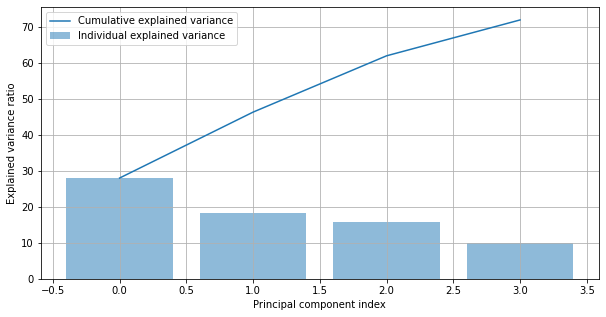

In [ ]:
pca = PCA(n_components=4)
pca.fit(xtrain)
print('Explained var: ')
exp_var =pca.explained_variance_ratio_*100 
print(exp_var)  # for each feature
total_var = pca.explained_variance_ratio_.sum() * 100
print('Total_var = %0.3f' % total_var)
cum_exp_var = np.cumsum(pca.explained_variance_ratio_ * 100)


fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(range(0,len(cum_exp_var)),cum_exp_var, label='Cumulative explained variance')
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.show()

 instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve

Explained var: 
[27.95732298 18.29361392 15.62304624  9.95034587  6.90481485  5.85830358
  3.61017921  3.42960434  2.6069961   2.00993289]
Total_var = 96.244


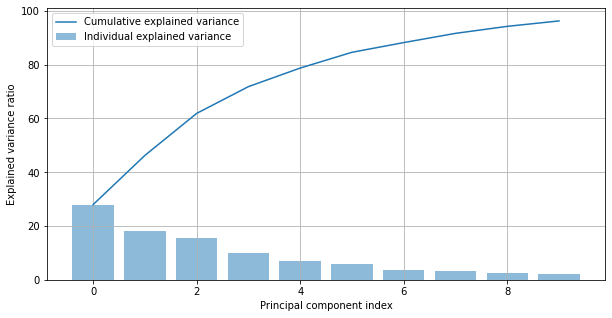

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(xtrain)
print('Explained var: ')
exp_var =pca.explained_variance_ratio_*100 
print(exp_var)  # for each feature
total_var = pca.explained_variance_ratio_.sum() * 100
print('Total_var = %0.3f' % total_var)
cum_exp_var = np.cumsum(pca.explained_variance_ratio_ * 100)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(range(0,len(cum_exp_var)),cum_exp_var, label='Cumulative explained variance')
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# pd.DataFrame(pca.components_)

In [ ]:
NCOMPONENT = 4
x_pca_train = pca.fit_transform(xtrain)
x_pca_test = pca.transform(xtest)
pd.DataFrame(x_pca_train)

,0,1,2,3,4,5,6,7,8,9
0,0.665832,-0.384891,-1.981748,-1.659762,-0.430485,-1.207092,1.751868,-0.516466,0.182989,-0.112554
1,-1.904088,-0.693740,1.190147,0.705482,-0.215722,0.755899,0.454853,0.944937,-0.857635,-0.233060
2,-1.121094,0.204640,0.737579,-1.488405,-0.501995,-0.368006,-0.456759,-0.014406,0.099986,-0.030636
3,-4.221874,-1.116630,1.441562,0.973806,-0.501615,0.147775,0.518196,0.193098,0.567633,-0.350906
4,4.597978,-0.065475,0.854771,2.484860,0.744408,0.887849,-0.062207,0.471767,-0.926748,-0.205911
...,...,...,...,...,...,...,...,...,...,...
2392,2.749384,1.553737,1.705828,0.451866,-0.489330,-0.016018,-0.509879,-0.977305,0.719874,1.056923
2393,-2.962618,-1.389203,0.512959,1.526224,-0.469889,-0.313385,0.044737,-0.341440,-0.058941,-0.549822
2394,-1.575401,6.024505,-1.687585,-1.040946,-0.765636,0.731164,-1.265272,0.797517,0.576950,0.428731
2395,-1.107448,0.711418,1.039590,0.362347,2.250151,-1.894570,-0.902487,-1.494046,-0.191788,0.319558


In [ ]:
NCOMPONENT = 10
x_pca_train = pca.fit_transform(xtrain)
x_pca_test = pca.transform(xtest)

# Multi layer model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                352       
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 111)               3663      
                                                                 
Total params: 5,071
Trainable params: 5,071
Non-trainable params: 0
_________________________________________________________________


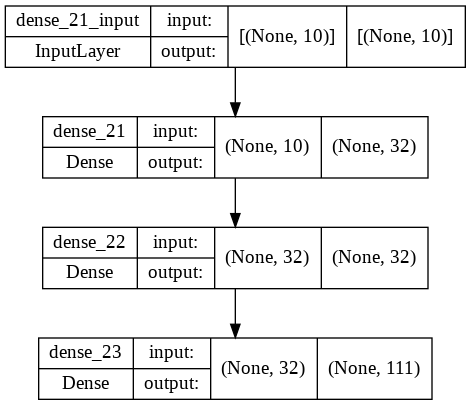

In [ ]:
model = Sequential([
    layers.Dense(32, activation='relu', input_shape=[NCOMPONENT]),
    layers.Dense(32, activation='relu'),
    layers.Dense(111, activation='softmax')
])
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])  #adam

# visualize your model
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
epochs = 500
history = model.fit(x_pca_train, y_dummy_train, epochs=epochs, validation_split=0.1, batch_size=16, verbose=1)

Epoch 1/500
135/135 [==============================] - 2s 3ms/step - loss: 4.5775 - accuracy: 0.0311 - val_loss: 4.2908 - val_accuracy: 0.0917
Epoch 2/500
135/135 [==============================] - 0s 2ms/step - loss: 3.8931 - accuracy: 0.1219 - val_loss: 3.4202 - val_accuracy: 0.2000
Epoch 3/500
135/135 [==============================] - 0s 2ms/step - loss: 3.1032 - accuracy: 0.2434 - val_loss: 2.8034 - val_accuracy: 0.2958
Epoch 4/500
135/135 [==============================] - 0s 2ms/step - loss: 2.5860 - accuracy: 0.3375 - val_loss: 2.4437 - val_accuracy: 0.3583
Epoch 5/500
135/135 [==============================] - 0s 2ms/step - loss: 2.2620 - accuracy: 0.3853 - val_loss: 2.2607 - val_accuracy: 0.3875
Epoch 6/500
135/135 [==============================] - 0s 2ms/step - loss: 2.0449 - accuracy: 0.4182 - val_loss: 2.0845 - val_accuracy: 0.4167
Epoch 7/500
135/135 [==============================] - 0s 2ms/step - loss: 1.8797 - accuracy: 0.4604 - val_loss: 1.9908 - val_accuracy: 0.4167

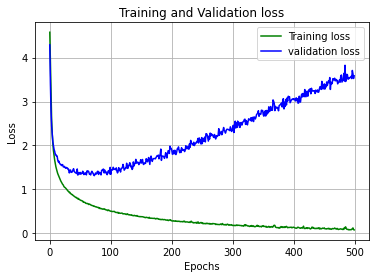

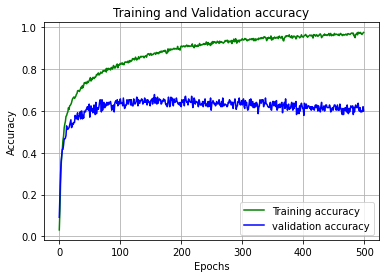

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,epochs)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Define Pipeline

In [ ]:
# create a pipeline

pca         = PCA()
# percep      = Perceptron()
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(111, activation='softmax')
])
adaline     = SGDClassifier()
standScaler = StandardScaler()
minmax      = MinMaxScaler()
pipe1 = Pipeline(steps = [('minmax', minmax), ('standScaler', standScaler), ('pca', pca), ('model', model)])  # transform -> fit
# pipe2 = Pipeline(steps = [('minmax', minmax), ('standScaler', standScaler), ('pca', pca), ('adaline', adaline)])

In [ ]:
# grid search: exhaustive search over specified parameter values for an estimator
param_grid  = dict(pca__n_components=[2, 4, 6, 8, 9], percep__eta0=[0.2, 0.5, 0.8 , 1.0])
grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10) 
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START pca__n_components=2, percep__eta0=0.2......................


ValueError: ignored

In [ ]:
# print best parameters: cross_validation score
print('Best parameters (CV score=%0.3f):' % grid_search.best_score_)
print(grid_search.best_params_)
ypred = grid_search.predict(xtest)
for a, b in zip(ytest, ypred):
  print(a, b)

Best parameters (CV score=0.146):
{'pca__n_components': 8, 'percep__eta0': 1.0}
IPA - American Lager - American Amber / Red
Lager - Märzen / Oktoberfest Brown Ale - American
Lager - Light Lager - European Dark
Lager - European Dark Lager - Schwarzbier
Stout - American Imperial Stout - American Imperial
Stout - Foreign / Export Wheat Beer - American Pale
IPA - Belgian Strong Ale - Belgian Pale
Chile Beer Chile Beer
Lager - Munich Dunkel Lager - Malt Liquor
Lager - Munich Dunkel Scottish Ale
Wheat Beer - American Pale Porter - Baltic
Lambic - Fruit Wheat Beer - Witbier
Stout - Oatmeal Porter - American
Stout - Irish Dry Stout - Irish Dry
Porter - Baltic Porter - American
Lager - Malt Liquor Lager - European Strong
Red Ale - American Amber / Red Red Ale - American Amber / Red
Dubbel Wheat Beer - American Pale
Lager - European Dark Brown Ale - American
Stout - American Imperial Stout - American Imperial
Brown Ale - American Brown Ale - American
Porter - Smoked Old Ale
Stout - American Impe

In [ ]:
pipe1.set_params(pca__n_components = 3, percep__eta0=0.2)
pipe1.verbose = True
pipe1.fit(xtrain, ytrain)
print('training score: %0.3f' % pipe1.score(xtrain, ytrain))
print('testing score: %0.3f' % pipe1.score(xtest, ytest))

[Pipeline] ............ (step 1 of 4) Processing minmax, total=   0.0s
[Pipeline] ....... (step 2 of 4) Processing standScaler, total=   0.0s
[Pipeline] ............... (step 3 of 4) Processing pca, total=   0.0s
[Pipeline] ............ (step 4 of 4) Processing percep, total=   0.2s
training score: 0.042
testing score: 0.044


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred = pipe1.predict(xtest)
for a, b in zip(ytest, ypred):
    print(a, b)

print('Confusion matrix:')
print(confusion_matrix(ytest, ypred))

print('Precision score = %0.3f' % precision_score(ytest, ypred, average='weighted'))
print('Recall score = %0.3f' % recall_score(ytest, ypred, average='weighted'))


IPA - American Red Ale - American Amber / Red
Lager - Märzen / Oktoberfest Lager - Adjunct
Lager - Light Lager - Munich Dunkel
Lager - European Dark Porter - English
Stout - American Imperial Stout - American Imperial
Stout - Foreign / Export Pale Ale - English
IPA - Belgian Red Ale - American Amber / Red
Chile Beer Lager - European Strong
Lager - Munich Dunkel Lager - European Strong
Lager - Munich Dunkel Porter - English
Wheat Beer - American Pale Fruit and Field Beer
Lambic - Fruit Fruit and Field Beer
Stout - Oatmeal Porter - English
Stout - Irish Dry Lager - Vienna
Porter - Baltic Porter - English
Lager - Malt Liquor Lager - European Strong
Red Ale - American Amber / Red Red Ale - American Amber / Red
Dubbel Strong Ale - Belgian Dark
Lager - European Dark Porter - English
Stout - American Imperial Red Ale - Irish
Brown Ale - American Porter - English
Porter - Smoked Pale Ale - English
Stout - American Imperial Porter - English
Farmhouse Ale - Bière de Garde Fruit and Field Beer
So

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(100, 2)


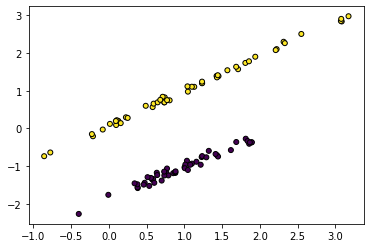

In [ ]:
# classification dataset:
x, y = datasets.make_classification(n_samples=100, n_features=2,  n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=42) # Random genererated classification dataset
x = np.asarray(x)
#print(x)
#print(y)
print(x.shape)

plt.figure
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=25, edgecolor='k')